# Task 4: Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import project_functions3 as p3
data = pd.read_csv('../data/raw/mars-weather.csv')
dfu = p3.unprocessed(data)
dfu

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [3]:
dfp = p3.load_and_process(data)
dfp

,earth_date,sol,ls,month,min_temp,max_temp,pressure,Season
0,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Winter
1,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Winter
2,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Winter
3,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Winter
4,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Winter
...,...,...,...,...,...,...,...,...
1887,2012-08-20,14,157,Month 6,-74.0,-16.0,740.0,Winter
1888,2012-08-19,13,157,Month 6,-74.0,-15.0,732.0,Winter
1889,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,Winter
1890,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,Winter


Here, we are using Malcolm's .py method chain to process the data, since we agreed it would be a good fit for all of us.

In [4]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
sol,1867.0,1015.670059,565.342298,10.0,546.5,1028.0,1505.5,1977.0
ls,1867.0,168.865024,105.599153,0.0,78.0,160.0,257.5,359.0
min_temp,1867.0,-76.121050,5.504098,-90.0,-80.0,-76.0,-72.0,-62.0
max_temp,1867.0,-12.510445,10.699454,-35.0,-23.0,-11.0,-3.0,11.0
pressure,1867.0,841.066417,54.253226,727.0,800.0,853.0,883.0,925.0


- The maximum temperature of max_temp is 11 degrees celsius. 
- The minimum temperature is of min_temp is -90 degree celsius! 
- It generally stays below zero on Mars as seen by the mean max_temp. 

<AxesSubplot:>

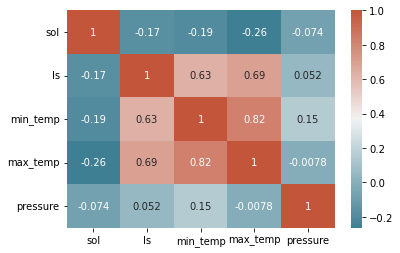

In [5]:
corr = dfp.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see there is a positive correlation between ls (Solar Longitude) and the max and minimum temperatures. There is slight correlation with pressure as well. Solar longitude, or the 'Mars-sun angle,' determines the season on Mars.

### Scatter plot

Text(0.5, 1.0, 'Seasonal variations by temperature')

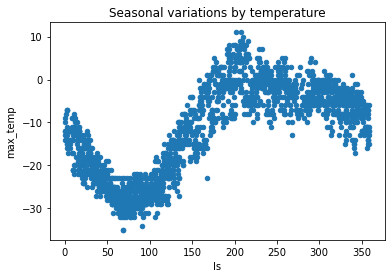

In [6]:
sp = dfp.plot(kind = 'scatter', x= 'ls', y='max_temp')
sp.set_title('Seasonal variations by temperature')

- 0 < ls < 90: Autumn 
- 90 < ls < 180: Winter
- 180 < ls < 270: Spring
- 270 < ls < 360: Summer

We can see here that there are seasonal variations. 
Between 0 and 90, the temperature dips to its lowest point, and gradually increases to its hottest temperature of around 11 degrees at an ls of 250. These temperature variations follow a sinusoidal curve, which agrees with the seasonal trends we would expect to see.

## Pair Plot

The pair plot will show the relationships between all the columns in the processed dataframe. 

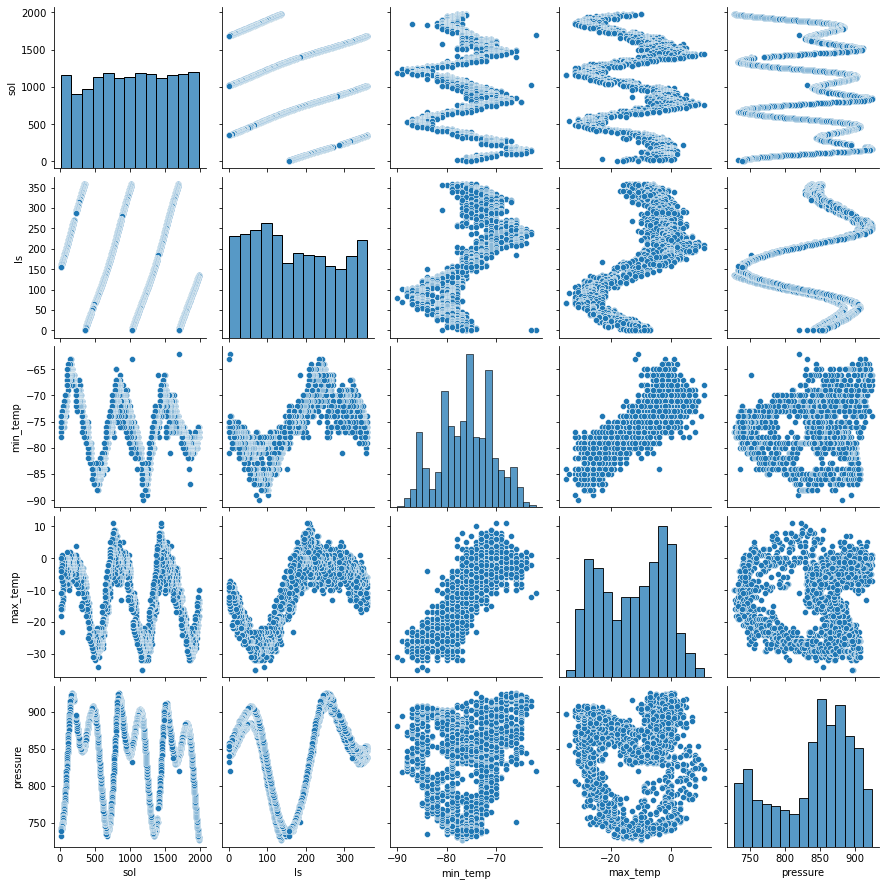

In [7]:
sns.pairplot(dfp)

### Analysis

There are many similar trends in these different plots.
- The graph of max_temp(y-value) and sol(x-value) is very similar to max_temp and ls, the difference being sol having greater amount of values but they still show the same trend of increasing and decreasing values of seasons. 
- The graph between ls(x-value)and pressure(y-value) shows the same trend as before, the different pressures in the context of ls shows the movement through the seasons. 
- Seasonal variations appear as sinusoidal or wave-like trends

Taking a closer look at the ls vs max_temp plot,

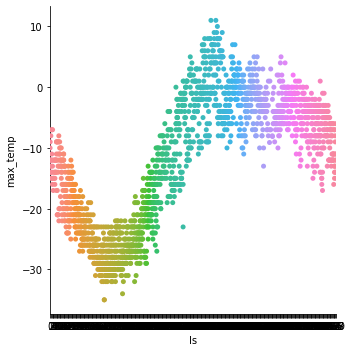

In [8]:
sns.catplot(x='ls', y='max_temp', data=dfp)

We can see that the maximum temperatures are well above zero, which is promising if we're hoping Mars can support life :)

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000018061A711F0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

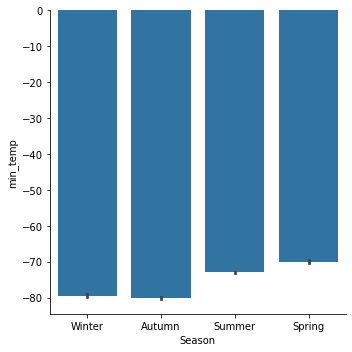

In [9]:
sns.catplot(x="Season",y="min_temp",data = dfp,kind ="bar",color="tab:blue")
sns.catplot

### Analysis

- Autumn has the coldest recorded temperature with winter being a close second. 
- Spring seems to stay a little warmer then summer overrall. 

# Conclusion

Overall, we can see seasonal variations from the data provided. Using the solar longitude (ls) as a marker for the seasons we can see Mars moves through seasons similar to Earth, where the temperature drops when nearing autumn and winter and increases from spring to summer. However, it stays much colder on that planet then ours, and it is generally below zero (which makes it much less hospitable).